In [96]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [97]:
cases= pd.read_csv('estimated_numbers.csv')
cases.head()

,Country,Year,No. of cases,No. of deaths,No. of cases_median,No. of cases_min,No. of cases_max,No. of deaths_median,No. of deaths_min,No. of deaths_max,WHO Region
0,Afghanistan,2017,630308[495000-801000],298[110-510],630308,495000.0,801000.0,298,110.0,510.0,Eastern Mediterranean
1,Algeria,2017,0,0,0,NaN,NaN,0,NaN,NaN,Africa
2,Angola,2017,4615605[3106000-6661000],13316[9970-16600],4615605,3106000.0,6661000.0,13316,9970.0,16600.0,Africa
3,Argentina,2017,0,0,0,NaN,NaN,0,NaN,NaN,Americas
4,Armenia,2017,0,0,0,NaN,NaN,0,NaN,NaN,Europe


In [98]:
incidence = pd.read_csv('incidence_per_1000_pop_at_risk.csv')
incidence.head()

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe


In [99]:
reports = pd.read_csv('reported_numbers.csv')
reports.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
0,Afghanistan,2017,161778.0,10.0,Eastern Mediterranean
1,Algeria,2017,0.0,0.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
3,Argentina,2017,0.0,1.0,Americas
4,Armenia,2017,0.0,NaN,Europe


In [100]:
cases.shape

(856, 11)

In [101]:
incidence.shape

(2033, 4)

In [102]:
reports.shape

(1944, 5)

In [103]:
cases.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 856 entries, 0 to 855
Data columns (total 11 columns):
Country                 856 non-null object
Year                    856 non-null int64
No. of cases            856 non-null object
No. of deaths           856 non-null object
No. of cases_median     856 non-null int64
No. of cases_min        544 non-null float64
No. of cases_max        544 non-null float64
No. of deaths_median    856 non-null int64
No. of deaths_min       524 non-null float64
No. of deaths_max       524 non-null float64
WHO Region              856 non-null object
dtypes: float64(4), int64(3), object(4)
memory usage: 73.7+ KB


In [104]:
reports.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1944 entries, 0 to 1943
Data columns (total 5 columns):
Country          1944 non-null object
Year             1944 non-null int64
No. of cases     1710 non-null float64
No. of deaths    1675 non-null float64
WHO Region       1944 non-null object
dtypes: float64(2), int64(1), object(2)
memory usage: 76.1+ KB


Data analysis of reported_numbers csv file

In [105]:
df1 = reports.sort_values(by = 'No. of cases', ascending=False)
df1 = df1[df1['Year']==2017][:50]

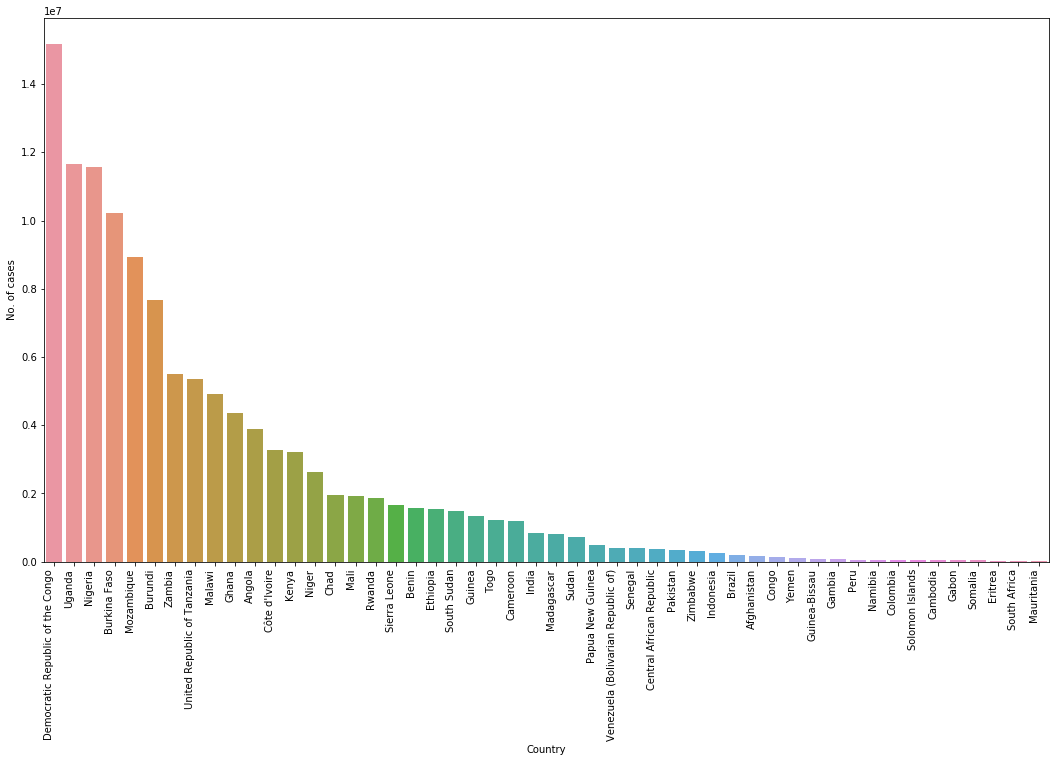

In [106]:
#Top 50 countries with largest number of cases in 2017
plt.figure(figsize=(18,10))
sns.barplot(df1['Country'], df1['No. of cases'])
plt.xticks(rotation=90, ha='right');

In [107]:
df2 = reports.sort_values(by = 'No. of cases', ascending=False)
df2 = df2[df2['Year']==2016][:50]

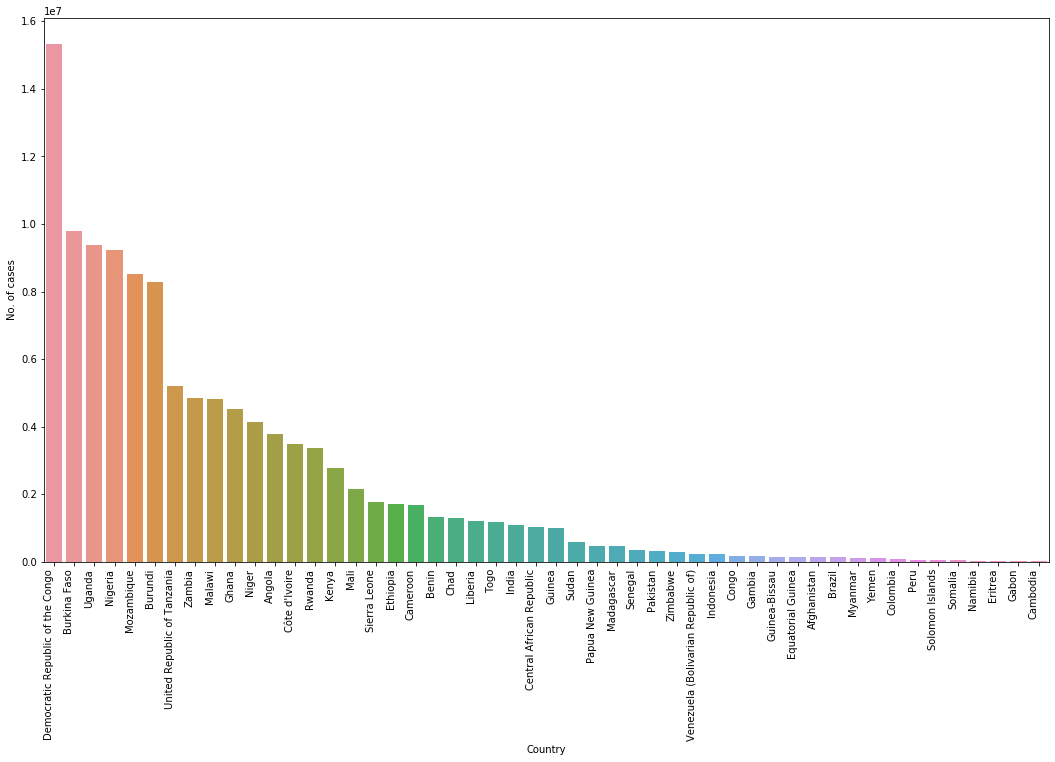

In [108]:
#Top 50 countries with largest number of cases in 2016
plt.figure(figsize=(18,10))
sns.barplot(df2['Country'], df2['No. of cases'])
plt.xticks(rotation=90, ha='right');

In [109]:
#Top 50 countries with largest number of deaths in 2017
df3 = df1[df1['Year']==2017][:50]
df3 = df3.sort_values(by = 'No. of deaths', ascending=False)

In [110]:
df3.head()

,Country,Year,No. of cases,No. of deaths,WHO Region
27,Democratic Republic of the Congo,2017,15176927.0,27458.0,Africa
2,Angola,2017,3874892.0,13967.0,Africa
98,Uganda,2017,11667831.0,5111.0,Africa
14,Burundi,2017,7670177.0,4414.0,Africa
13,Burkina Faso,2017,10225459.0,4144.0,Africa


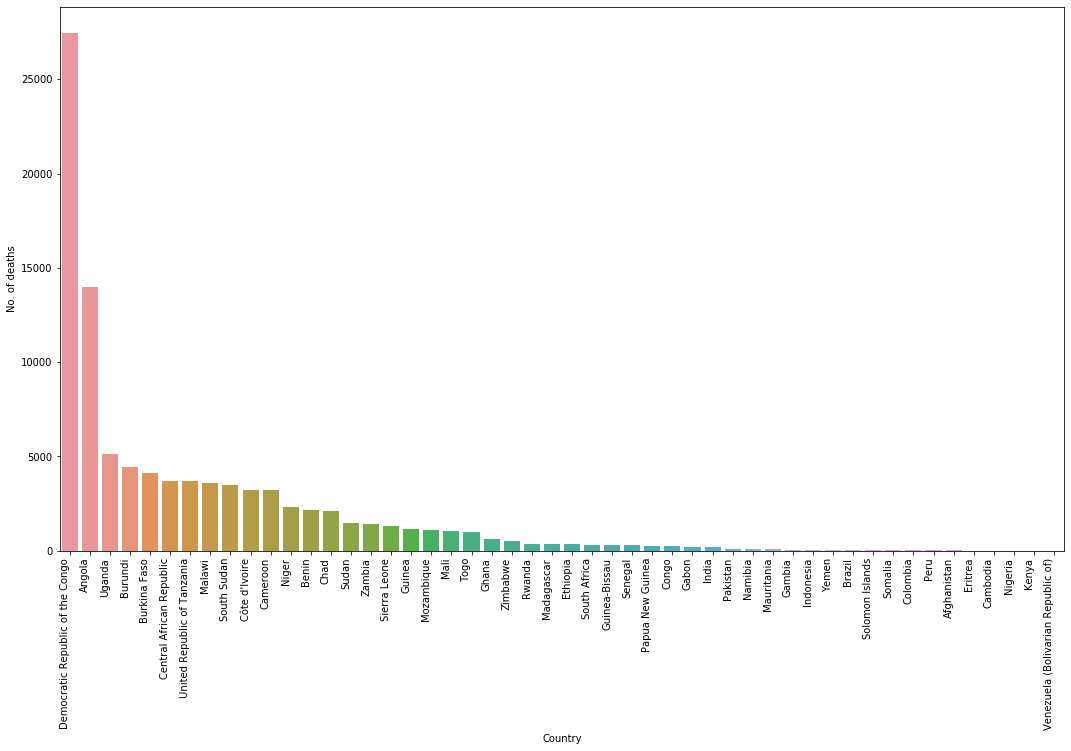

In [111]:
#Top 50 countries with largest number of deaths in 2017
plt.figure(figsize=(18,10))
sns.barplot(df3['Country'], df3['No. of deaths'])
plt.xticks(rotation=90, ha='right');

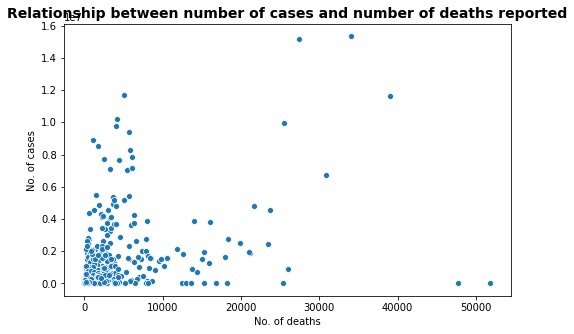

In [112]:
#Relationship between number of cases and number of deaths reported
plt.figure(figsize =(8,5))
plt.title('Relationship between number of cases and number of deaths reported', fontsize=14, fontweight='bold')
ax =sns.scatterplot(x= 'No. of deaths', y ='No. of cases',data = reports)

In [113]:
df4 =reports.groupby('Year').sum().loc[:, ['No. of cases', 'No. of deaths']]

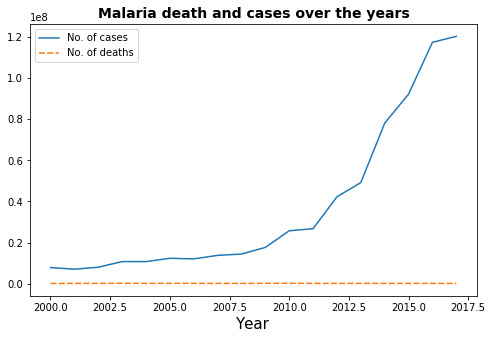

In [114]:
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df4)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases over the years', fontsize=14, fontweight='bold')
plt.show()

In [115]:
#Total cases reported which was region wise
df5 =reports.groupby('WHO Region').sum().loc[:, ['No. of cases', 'No. of deaths']]

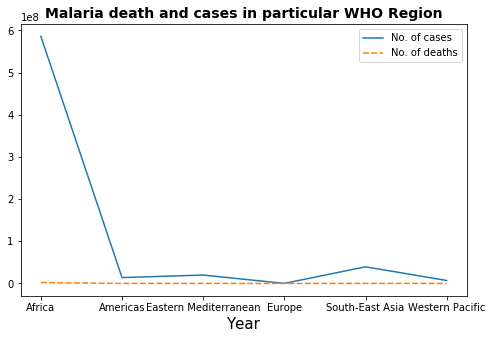

In [116]:
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df5)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases in particular WHO Region', fontsize=14, fontweight='bold')
plt.show()

In [117]:
df4.head()

,No. of cases,No. of deaths
Year,,
2000,7816830.0,88220.0
2001,7026451.0,112612.0
2002,7971965.0,119336.0
2003,10732686.0,161577.0
2004,10714285.0,122020.0


Data analysis for incidence_per_1000_pop_at_risk csv file

In [118]:
incidence.head()

,Country,Year,No. of cases,WHO Region
0,Afghanistan,2018,29.01,Eastern Mediterranean
1,Algeria,2018,0.00,Africa
2,Angola,2018,228.91,Africa
3,Argentina,2018,0.00,Americas
4,Armenia,2018,0.00,Europe


In [119]:
df6 =reports.groupby('Year').sum().loc[:, ['No. of cases']]

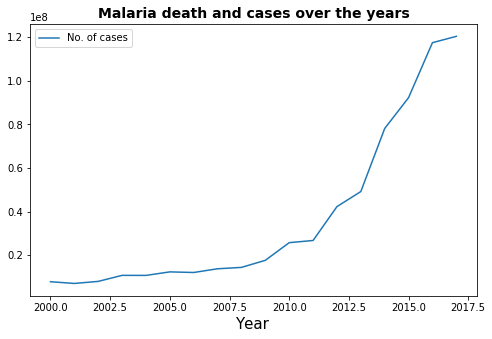

In [120]:
plt.figure(figsize =(8,5))
ax = sns.lineplot(data=df6)
plt.xlabel('Year', fontsize=15)
plt.title('Malaria death and cases over the years', fontsize=14, fontweight='bold')
plt.show()

Linear Regression for reported_numbers csv file 

In [121]:
reports.isnull().sum()
#missing values in Item_weight and Outlet_size needs to be imputed
mean = reports['Year'].mean() #imputing mass with mean
reports['Year'].fillna(mean, inplace =True)
mean = reports['No. of cases'].mean() #imputing width with mean
reports['No. of cases'].fillna(mean, inplace =True)
mode = reports['No. of deaths'].mode() #imputing height with mode
reports['No. of deaths'].fillna(mode[0], inplace =True)

In [122]:
# Import matplotlib and seaborn libraries to visualize the data
import matplotlib.pyplot as plt 
import seaborn as sns


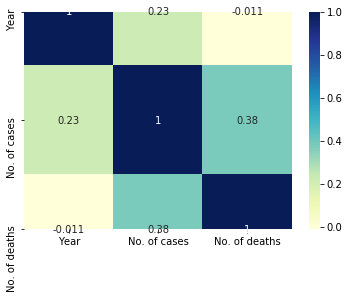

In [123]:
# Visualizing the data using heatmap
sns.heatmap(reports.corr(), cmap="YlGnBu", annot = True)
plt.show()

In [124]:
# Creating X and y
X = reports['Year']
y = reports['No. of cases']

In [125]:
# Splitting the varaibles as training and testing
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.7, 
                                                    test_size = 0.3, random_state = 100)

In [126]:
# Take a look at the train dataset
X_train
y_train


480     3.435270e+05
843     9.002830e+05
1928    1.906400e+04
549     3.897303e+05
865     0.000000e+00
            ...     
1879    3.897303e+05
1895    3.897303e+05
1859    1.575100e+04
792     1.158197e+06
1544    8.500000e+01
Name: No. of cases, Length: 1360, dtype: float64

In [127]:
# Importing Statsmodels.api library from Stamodel package
import statsmodels.api as sm

# Adding a constant to get an intercept
X_train_sm = sm.add_constant(X_train)


C:\Users\Welcome\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:2389: FutureWarning: Method .ptp is deprecated and will be removed in a future version. Use numpy.ptp instead.
  return ptp(axis=axis, out=out, **kwargs)


In [128]:
# Fitting the resgression line using 'OLS'
lr = sm.OLS(y_train, X_train_sm).fit()

# Printing the parameters
lr.params


const   -1.224082e+08
Year     6.116076e+04
dtype: float64

In [129]:
# Performing a summary to list out all the different parameters of the regression line fitted
lr.summary()


<class 'statsmodels.iolib.summary.Summary'>
"""
                            OLS Regression Results                            
==============================================================================
Dep. Variable:           No. of cases   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     89.13
Date:                Mon, 08 Mar 2021   Prob (F-statistic):           1.55e-20
Time:                        21:28:35   Log-Likelihood:                -21011.
No. Observations:                1360   AIC:                         4.203e+04
Df Residuals:                    1358   BIC:                         4.204e+04
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
==============================================================================
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const      -1.224e+08    1.3e+07     -9.408      0.000   -1.48e+08   -9.69e+07
Year        6.116e+04   6478.442      9.441      0.000    4.85e+04    7.39e+04
==============================================================================
Omnibus:                     1496.561   Durbin-Watson:                   2.011
Prob(Omnibus):                  0.000   Jarque-Bera (JB):            98585.062
Skew:                           5.518   Prob(JB):                         0.00
Kurtosis:                      43.224   Cond. No.                     7.77e+05
==============================================================================

Warnings:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
[2] The condition number is large, 7.77e+05. This might indicate that there are
strong multicollinearity or other numerical problems.
"""

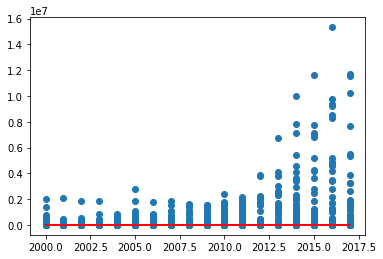

In [130]:
# Visualizing the regression line
plt.scatter(X_train, y_train)
plt.plot(X_train, 6.948 + 0.054*X_train, 'r')
plt.show()


In [131]:
# Predicting y_value using traingn data of X
y_train_pred = lr.predict(X_train_sm)

# Creating residuals from the y_train data and predicted y_data
res = (y_train - y_train_pred)


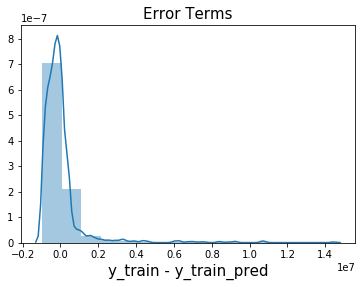

In [132]:
# Plotting the histogram using the residual values
fig = plt.figure()
sns.distplot(res, bins = 15)
plt.title('Error Terms', fontsize = 15)
plt.xlabel('y_train - y_train_pred', fontsize = 15)
plt.show()


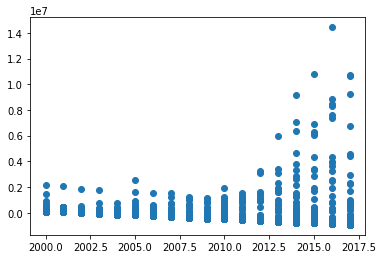

In [133]:
# Looking for any patterns in the residuals
plt.scatter(X_train,res)
plt.show()


In [134]:
# Adding a constant to X_test
X_test_sm = sm.add_constant(X_test)

# Predicting the y values corresponding to X_test_sm
y_test_pred = lr.predict(X_test_sm)

# Printing the first 15 predicted values
y_test_pred


1130    341454.264840
509     708418.809388
371     769579.566813
679     586097.294539
1337    219132.749990
            ...      
1792    -25510.279709
533     708418.809388
1323    219132.749990
64      953061.839087
202     891901.081662
Length: 584, dtype: float64

In [135]:
# Importing r2_square
from sklearn.metrics import r2_score

# Checking the R-squared value
r_squared = r2_score(y_test, y_test_pred)
r_squared


-0.023388874650981384

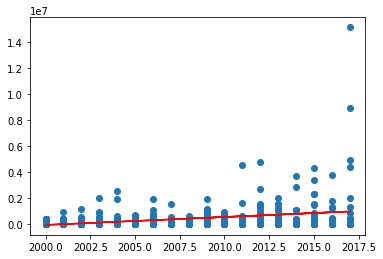

In [136]:
# Visualize the line on the test set
plt.scatter(X_test, y_test)
plt.plot(X_test, y_test_pred, 'r')
plt.show()


In [137]:
# Splitting the data into train and test
from sklearn.model_selection import train_test_split
X_train_lm, X_test_lm, y_train_lm, y_test_lm = train_test_split(X, y, train_size = 0.7, 
                                                                test_size = 0.3, random_state = 100)


In [138]:
# Shape of the train set without adding column
X_train_lm.shape

# Adding additional column to the train and test data
X_train_lm = X_train_lm.values.reshape(-1,1)
X_test_lm = X_test_lm.values.reshape(-1,1)

print(X_train_lm.shape)
print(X_test_lm.shape)


(1360, 1)
(584, 1)


In [139]:
from sklearn.linear_model import LinearRegression

# Creating an object of Linear Regression
lm = LinearRegression()

# Fit the model using .fit() method
lm.fit(X_train_lm, y_train_lm)


LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [140]:
# Intercept value
print("Intercept :",lm.intercept_)

# Slope value
print('Slope :',lm.coef_)


Intercept : -122408185.88660109
Slope : [61160.75742473]


In [141]:
# Making Predictions of y_value
y_train_pred = lm.predict(X_train_lm)
y_test_pred = lm.predict(X_test_lm)

# Comparing the r2 value of both train and test data
print('r2_score train set:',r2_score(y_train,y_train_pred))
print('r2_score train set:',r2_score(y_test,y_test_pred))


r2_score train set: 0.061588298688542875
r2_score train set: -0.023388874650998703
